# Graphene / metal oxide powders x-ray diffraction

## Comparison of x-ray diffractions in the process of heating the samples

### Plot componds of your choice
Select which compound you want to plot and to be displayed in normal or logarithmic scale

You can specify whether to show the plots in jupyter or save the on your computer

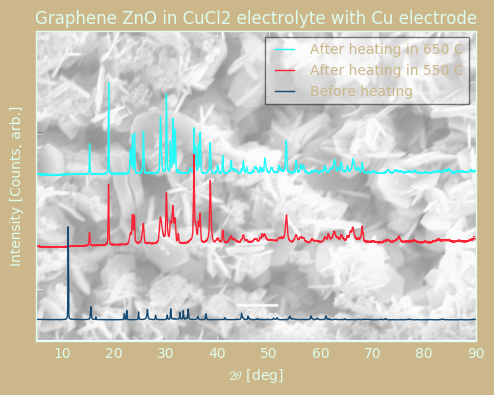

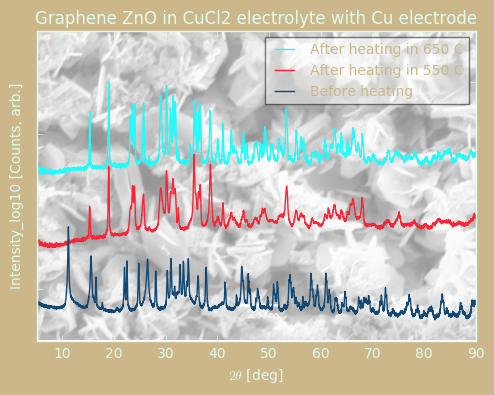

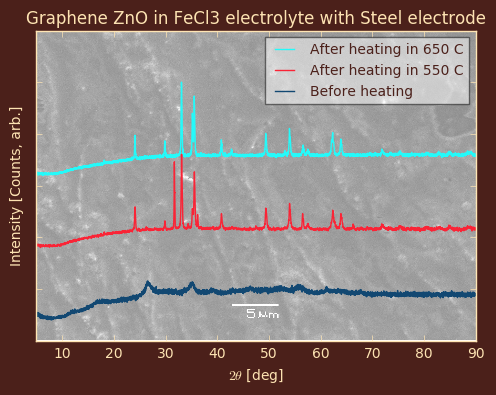

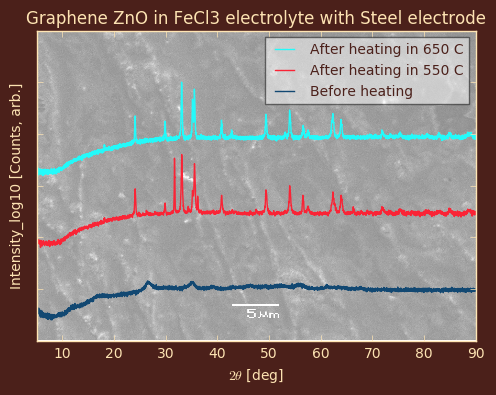

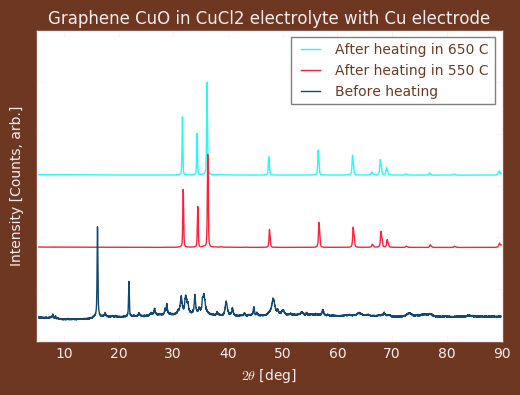

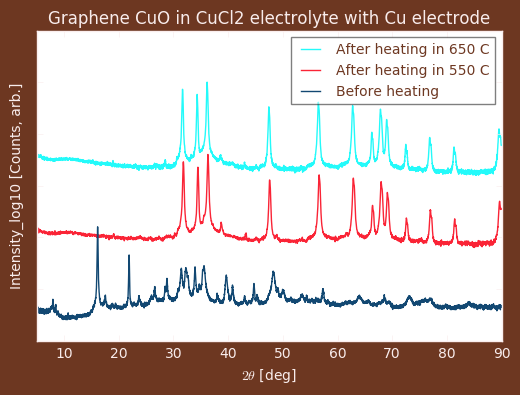

In [1]:
import itertools
import notebook_finder
import xray_plots_helper_classes as xphc


# ****** PLOT OPTIONS ******

# here your can set how individual plots will show in figure in relation to each other
# plotHeight, plotDistance, offset parameters in percentage [%] of figure height
    # plotHeight ~> height of each plot in relation to the figure height
    # plotDistance ~> how far are the plots spaced between each other f.ex. between 550ºC and  650ºC
    # offset ~> the level at which the first plot will show above x axis
plotsOptions = xphc.PlotsOptions(30, 24, 8)

# files paths
plotsOptions.xrdFilesPath = 'xrd/'
plotsOptions.bgImagesPath = 'SEM/'
plotsOptions.saveFiguresDestinationPath = 'figures/before and after heating/'

plotsOptions.bgImagesFileNameSufixAndExtension = '_SEM_AfterElectrolysis.tif'
plotsOptions.savedFiguresFileExtension = '.png'

plotOptions.legendBoxOpacity = 0.5
plotOptions.bgImageOpacity = 0.2


# ****** PLOT COLORS ******

# color themes ~> to modify a color theme, copy existing one and insert your changes there
#                                      CuO/CuCl2  ZnO/CuCl2  Zno/FeCl3                   CuO/CuCl2  ZnO/CuCl2  Zno/FeCl3
themes_first_suggestions = {'theme' : ["#960018", "#456456", "#FFE5B4"], 'background' : ["#faeeee", "#defdef", "#4B201A"]}
themes_from_xrayholders  = {'theme' : ["#faeeee", "#defdef", "#FFE5B4"], 'background' : ["#6D3721", "#CCB78A", "#4B201A"]}

# colors of the plots
plotsColors_ver1 = ['#24fafa', '#fa2436', '#124872']

# select your color theme from the options above
theme = themes_from_xrayholders
plotsColors = plotsColors_ver1


# ****** SELECTION OF POWDERS ******

# powders to select from 
electroCuOCucl2 = xphc.PowderAfterElectrolysis('CuO', 'CuCl2', 'Cu', theme['background'][0], theme['theme'][0])
electroZnOCucl2 = xphc.PowderAfterElectrolysis('ZnO', 'CuCl2', 'Cu', theme['background'][1], theme['theme'][1])
electroZnOFeCl3 = xphc.PowderAfterElectrolysis('ZnO', 'FeCl3', 'Steel', theme['background'][2], theme['theme'][2])

# select compounds you would like to have plotted 
chosenFormulas = [electroZnOCucl2, electroZnOFeCl3, electroCuOCucl2]


# ****** LOG AND/OR NORMAL PLOTS & SHOW OR SAVE FIGURES ******

# Paremeters to literate through for all combinations
isLogarithmic = [False, True]

# Choose whether to save figures on the disk or show inline
saveOnDisk = False


# ****** PLOT RESULTS ******

# iterate through combinations and make figuresx
for x in list(itertools.product(chosenFormulas, isLogarithmic)):
    xphc.plotBeforeAfterHeating(x[0], x[1], saveOnDisk, plotsColors, plotsOptions)
    
    

## Comparison of Graphene/CuO in CuCl2 to top 4 matches in database

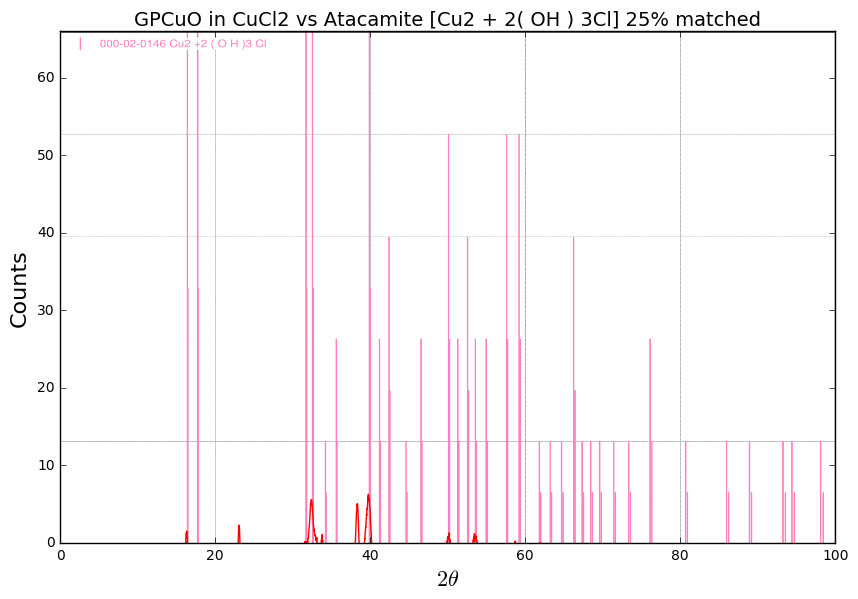

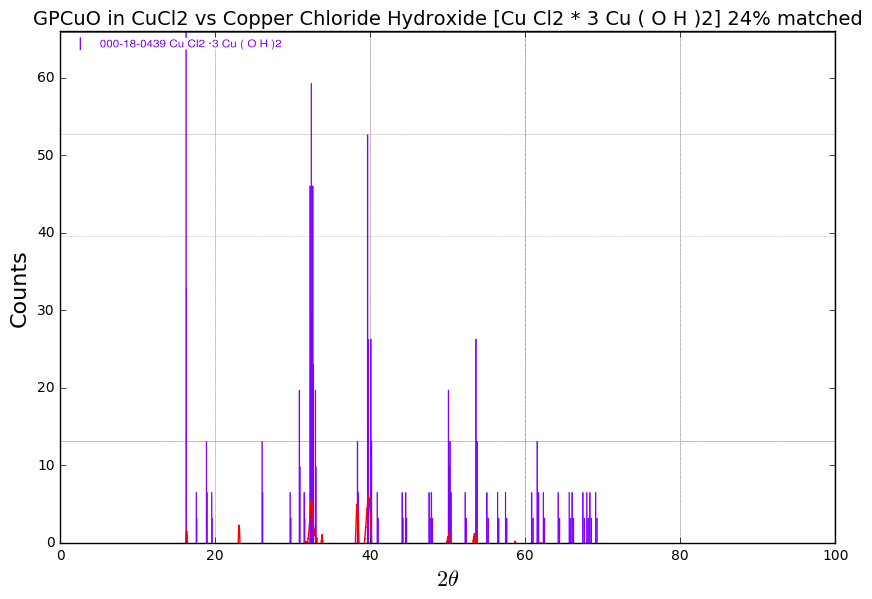

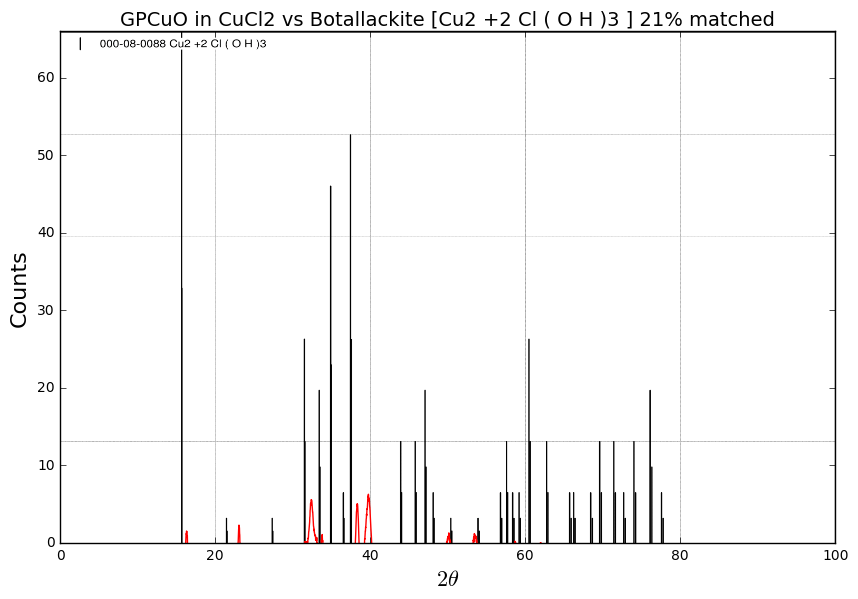

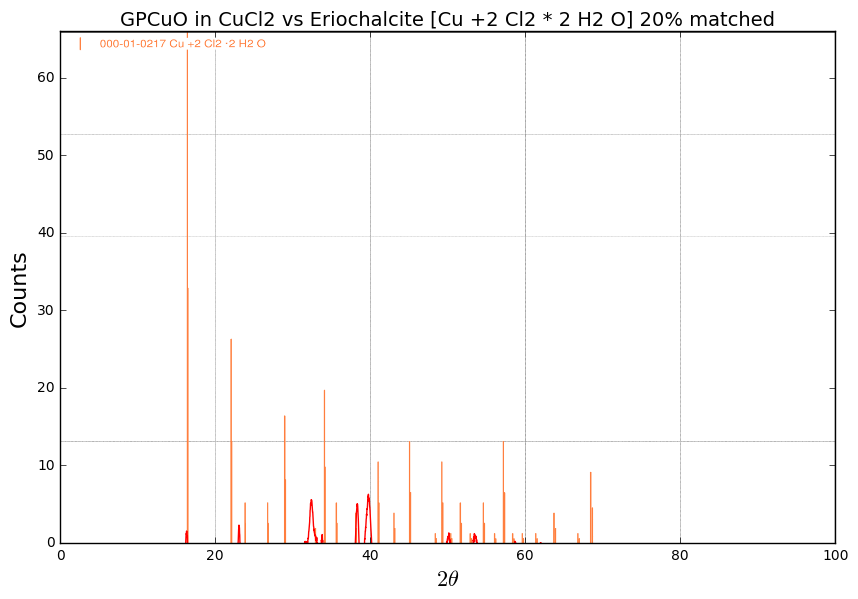

In [2]:
import csv
import matplotlib.pyplot as plt
from scipy.misc import imread
import numpy as np
from PIL import Image

x = []
y = []

with open('xrd/Graphene_ZnO_in_CuCl2_before.xy','r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        x.append(row[0])
        y.append(row[1])

y = [np.log10(float(i))*20-66 for i in y]

matchFileNamesTop = [['Atacamite', 'Cu2 + 2( OH ) 3Cl', '25%'], 
                     ['Copper Chloride Hydroxide', 'Cu Cl2 * 3 Cu ( O H )2', '24%'], 
                     ['Botallackite', 'Cu2 +2 Cl ( O H )3 ', '21%'],
                     ['Eriochalcite', 'Cu +2 Cl2 * 2 H2 O', '20%']]

for mf in matchFileNamesTop:
    fig = plt.figure(figsize=(10, 7), dpi=100)
    # figure's title
    plt.title(r"GPCuO in CuCl2 vs " + mf[0] + " [" + mf[1] + "] " + mf[2] + " matched", fontsize=14)
    #img = Image.open("cytherea.jpg"), 
    img = Image.open("graphs/" + mf[0] + "-1.png")
    img = img.crop( (116,1140,1587,2220) )
    #fig1, ax1 = plt.subplots()
    lines= plt.plot(x,y,'r', zorder=1)
    # ax1.set_yscale('log')
    plt.imshow(img, zorder=0, extent=[0, 100, 0, 66])
    plt.xlabel(r'$2 \theta$', fontsize=16)
    plt.ylabel('Counts', fontsize=16)
    plt.show()
    # plt.savefig('figures/Graphene_CuO_CuCl2_comparison_with_database/' + mf[0] + '_topmatch.png', transparent=True)
    

